# Techniques of UV (NUV, FUV, EUV, SXR) Spectroscopy
_Charles Kankelborg, Montana State University, 2025_

__In 1967, James A. R. Samson of the University of Nebraska-Lincoln published a book entitled _Techniques of Vacuum Ultraviolet Spectroscopy._ As it happens, I was born the same year. Thirty years later, Samson autographed a copy of this book for Brian Handy, who was then Postdoc #1 on the NASA TRACE mission at Montana State University. I was Postdoc #2. Brian gave me the book before leaving MSU and Solar Physics for a career in the banking industry in Japan. Brian died in a tragic plane accident in 2014.__

Samson defined the Vacuum Ultraviolet as 6-6000 eV (0.2-200 nm wavelength). My career so far has been spent studying the solar atmosphere in these wavelengths. I am not attempting to write a book, let alone so comprehensive a volume as Samson's. But technology has changed a lot since then, and I have been developing these notes to give my students an entry point into the field of ultraviolet astronomical instrumentation.

![SDO_2020Oct2_1024_0171.jpg](figures/SDO_2020Oct2_1024_0171.jpg)

_Above: The solar corona at 17.1 nm. Most of the light in passband comes from a spectral emission line of eight times ionized iron (Fe IX), which forms at temperatures around 700,000 K [(see, e.g., O'Dwyer, 2010)](http://dx.doi.org/10.1051/0004-6361/201014872). The presence of a hot corona (more than 2 orders of magnitude hotter than the solar photosphere) is an enduring mystery of solar physics._

These notes are a work in progress. I emphasize my main interests, imaging and spectroscopy of the Sun in _soft x-ray_ __(SXR, 0.1-10 nm)__, _extreme ultraviolet_ __(EUV,  10-100 nm)__, and _far ultraviolet_ __(FUV, 100-200 nm)__. In these spectral ranges, we see mainly emission lines from the corona, transition region, and chromosphere; and some UV continuum at 150-200 nm. Since the EUV and FUV are strongly absorbed by air, we group them together into the _vacuum ultraviolet_ __(VUV)__. Observation is done exclusively from space, because the wavelengths of interest do not reach the ground. I'll say only a little about the _near ultraviolet __(NUV, 200-400 nm)__. 


__These definitions (SXR, EUV, FUV, VUV, NUV) are squishy, and just about every reference will have different values.__

![Atmospheric Absorption](figures/Meier1991SSRv_atmosUV.png)

_R. R. Meier,_ Space Sci Rev ___58:__ 1-185, 1991._


![VUV transmission of air at 1 atmosphere, room temperature.](figures/Air0.2mm.png) 

_Transmission of VUV radiation by 0.2mm of air at room temperature and 1 atmosphere pressure [(CXRO).](https://henke.lbl.gov/optical_constants/gastrn2.html)_

### Exercise
1. Use the [(CXRO).](https://henke.lbl.gov/) online tool to plot transmission of 1 cm of air, as a function of log wavelength from 0.1 to 100 nm.
2. Now do it for He instead of air.


VUV is a very difficult wavelength range to work with. I contentd that __If you can observe in the vacuum ultraviolet, you can do anything.__ Perhaps this will whet your appetite to actually build intruments. However, teaching you to build instruments is not my immediate goal. I can't do that in a day. Instead, I will tell you just enough to appreciate where data comes from, and what challenges might be involved in  instrumental work and data analysis. __In any scietific field, the data always turn out to be a mess. You have to be willing to understand and cope with its idiosyncracies and defects if you are going to get meaningful results.__ 

I aim to discuss the major techniques used in VUV spectroscopy. This also entails some discussion of imaging optics. I will not be talking about spectropolarimetry.


## Outline
1. Imagers and spectrographs
    1. Optics
    1. Filters
    1. Detectors
    1. Sensitivity
    1. Contamination control
    1. Mission Design
1. The vissicitudes of data
    1. Detection of photons
    1. Backgrounds
    1. Discretization and data compression
    1. Sampling and PSF
    1. Deconvolution

## Online Resources
- The [Center for X-Ray Optics](https://henke.lbl.gov/optical_constants/) has tabulated optical constants for VUV wavelengths, and online tools that are helpful for designing filters and coatings.
- [Optika](https://github.com/sun-data/optika), a Python library for simulating optical elements, systems and detectors. It includes the CXRO optical constants, a raytracing engine, and much more.

In [1]:
10**5.85

707945.7843841374

# 1. Telescopes and Spectrographs

Refracting optics won't work for VUV (but the predispersing slit prism in IRIS is an interesting counter-example), so we're going to talk primarily about reflecting designs.

## Normal Incidence Telescope Optics
A handy resource for detailed information on telescopes and telescope design is [telescope-optics.net.](https://www.telescope-optics.net). It's a site aimed at amateur telescope makers; but don't be put off by the word amateur. These folks are fairly sophisticated.


### The Herschellian telescope

You've probably never heard of the Herschellian telescope. It is just a parabolic mirror that forms an image. The length of this telescope is (at minimum) its focal length. It is built off-axis, so that the detector does not block the aperture. Herschellians have some value for VUV work since there is only one reflection. This design minimizes light loss and scatter, and takes the best advantage of a limited aperture.

![Herschellian](figures/herschellian.png)

The basic design trade-off with telescopes is the f/ratio, also called f-number or f/#.
$$
    f/\# \equiv \frac{f}{D}.
$$
- High $f/\#$:
    - Low aberration
    - Can sometimes use spherical optics instead of conics (inexpensive)
    - Large image size
    - Long instrument
- Low $f/\#$:
    - High light gathering for a given focal length
    - Increased aberration
    - Short instrument

This is engineering, not pure science. We often use words like _applied science_ or _experimental physics_ to avoid admitting that we are doing engineering. While there are wrong answers in this business, there are usually __many right answers.__ It is about making trade-offs to meet requirements. Fun fact: Loren Acton's dundergraduate egree at Montana State College was in _Engineering Physics_.




### The  Cassegrain

![Classical Cassegrain](figures/cassegrain.png)

The classical Cassegrain relies on the focusing properties of a parabolic (infinite-finite) primary mirror and a hyperbolic (virtual finite-finite) secondary mirror to form an image with magnification
$$
    M = \frac{c}{a}.
$$
Consequently, the __effective focal length (EFL)__ of the telescope is 
$$
\mathrm{EFL} = Mf.
$$
Magnification allows us to build a compact telescope, much shorter than its focal length. The geometry is also convenient for feeding a spectrograph slit (e.g., [IRIS](https://www.lmsal.com/)). The higher the magnification, the trickier it becomes to align the telescope and maintain the alignment well enough to realize the potential of this design. [TRACE](https://sdowww.lmsal.com/TRACE/)), for example, used a [cassegrain design](http://jsoc.stanford.edu/HMI/docs/AIA_calibration.pdf) with a magnification of 6. 

The Ritchey-Crétien is a variation that uses hyperbolae for both mirrors. It offers good image quality over a wider field of view. In practice the sacrifice is negligible, since on-axis is the least challenging place to get good image quality. The Hubble Space Telescope is a Richey-Chrétien with magnification of 10.43, and it works in FUV (down to 115 nm) as well as visible. The [AIA](http://jsoc.stanford.edu/HMI/docs/AIA_calibration.pdf) telescopes also used the Richey-Chrétien design.

Other high performance variations include the Schmidt-Cassegrain, the Maksutov Cassegrain, and the Modified Dall-Kirkham. These last three require a refractive corrector plate, so they are not useful for VUV work (maybe in FUV you could use a MgF2 corrector; I don't know if that has been tried). 

__Fun fact:__ the Multi-Spectral Solar Telescope Array (MSSTA) rocket payload that we launched when I was a grad student had 2 classical Cassegrains, 6 Ritchey-Chrétiens, and 11 Herschellian telescopes, each with EUV multilayer coatings for a different wavelength band.


### Exercise
A primary mirror of diameter $D$ and focal length $f$ is used to build a Cassegrain with magnification $M$ and back focal length $b$. 
1. Assuming that on-axis rays connect the outer edges of the primary and secondary mirrors as in the diagram, find the overall length $c$ and the required diameter $d$ of the secondary mirror.  What fraction of the aperture _area_ is obscured by the secondary? 
1. Let's take some practical values: $D=0.2\,\mathrm{m}$, $f=1.0\,\mathrm{m}$, $b=0.1\,\mathrm{m}$, and $M=4$. 
    1. What is the _f_-ratio of the primary mirror?
    1. What is the overall length $c$?
    1. What is $d$? What fraction of the aperture area is obscured by the secondary?
    1. Assume the detector pixel size is $12\,\mathrm{\mu m}$. What is the size of the pixel in arc seconds?
    1. If the detector format is $2048\times 2048$ pixels, what is the field of view in arc minutes?

## Grazing Incidence Telescope Optics (SXR)


![Gold mirror reflectivity, normal incidence](figures/normal-incidence.png)

_Reflectivity of gold at normal incidence._

The above plot should convince you that normal incidence optics in VUV are of limited use. Until the 1980s, the only technology available to get reflectivity >5% in EUV or soft x-ray was grazing incidence reflection, skipping off a mirror at a grazing angle of __a few degrees or less.__ 

![Gold mirror reflectivity, 3 deg AOI](figures/grazing-incidence-3deg.png)
![Gold mirror reflectivity, 0.5 deg AOI](figures/grazing-incidence-0.5deg.png)


![Wolter I](figures/Wolter-I.png)

_A Wolter Type I telescope. Illustration from [Wikipedia](https://en.wikipedia.org/wiki/Wolter_telescope).  This is a conceptual diagram. In practice, the angles are much more grazing (closer to the surface)._

![Hinode XRT](figures/XRT_instrument.png)

_A contemporary example of the Wolter I is the [X-Ray Telescope (XRT) on Hinode.](https://link-springer-com.proxybz.lib.montana.edu/article/10.1007/s11207-007-0182-1)_

Grazing incidence telescopes are still used in _soft X-ray_ __(SXR, 0.1-10 nm).__
- Advantage: High reflectivity
- Disadvantage: Small collecting area

![XRT image](figures/XRT_Sigmoid_FFI4context.jpg)

_Hinode XRT image of a [sigmoid,](http://solar.physics.montana.edu/press/XRT_Sigmoid.html) precursor to the February 12, 2007 eruption. You can find more full disk XRT images in the [Synoptic Composite Image Archive at MSU](http://solar.physics.montana.edu/HINODE/XRT/SCIA/latest_month.html)._

## Filters and Coatings
The solar spectrum is dominated by visible continuum, with only a tiny fraction of the solar luminosity in VUV. 
This is a recipe for disaster when attempting to do spectroscopy in VUV. The spectra below are from _solar maximum_. VUV is much lower during solar minimum.

_![Solar spectral irradiance](figures/SORCE_lin.png)
Solar spectral irradiance from SORCE. You can plot data from any available date interactively on the [LISRD website.](http://lasp.colorado.edu/lisird/data/sorce_ssi_l3/)_

![Solar spectral irradiance](figures/SORCE_log.png)

_Same data as previous figure, log scale._

To observe the comparatively faint solar corona and transition region, we must confront the following challenge: __Reject infrared and visible light, yet keep the comparatively faint VUV wavelengths.__ Telescopes require extremely high suppression ratio. Even in a spectrograph, where the diffraction grating offers high wavelength selectivity, we must still contend with stray slight (especially visible, near UV, and near IR).

### Thin film filters for EUV

Thin film metallic filters can reject the blindingly bright visible sunlight while transmitting about half the incident EUV. 

![Visible light rejection](figures/Al_filter_Powell1993.png)

_A very thin film of Al suffices to reject visible light from the Sun. Source: [Powell, _Proc. SPIE_ __2011:__ 428-437, 1993.](https://luxel.com/wp-content/uploads/2010/04/multilay.pdf)_

It is also possible to reject wavelengths that would potentially contaminate the measurement. Tellurium (Te), for example, has a sharp absorption edge at 32.6 nm. On Skylab, this was used to cut out the extremely bright He II Lyman alpha 30.4 nm line [(Schumacher & Hunter, 1977)](https://www-osapublishing-org.proxybz.lib.montana.edu/ao/fulltext.cfm?uri=ao-16-4-904&id=20979). It is also common to use absorption edges to eliminate higher diffracted spectral orders (e.g., from gratings or multilayer coatings).

![Reject He II](figures/Heii_reject.png)

_The databases are not always right. CXRO has the Te line in the wrong place! This error (and my own ignorance) once led me to a ten thousand dollar mistake. Source: [CXRO](https://henke.lbl.gov/optical_constants/filter2.html)_

![Filter materials](figures/xmission-Chart-high-res9_7_2012.png)

_A selection of filter materials with potentially useful absorption edges. Source: [Luxel](https://luxel.com/wp-content/uploads/2014/08/xmission-Chart-high-res9_7_2012.png)_

### Exercise
The plot from Powell (1993, above) would seem to indicate that a thin film Al filter has visible transmission of $<10^{-9}$ for visible light as compared to EUV, but practically it is difficult to do better than $10^{-8}$ (can you guess why?). Look back at the spectral irradiance plot, and make a rough order of magnitude estimate of its integral. What rejection ratio is needed to make a useful EUV telescope? Find a paper that describes some thin film EUV filters (perhaps something connected with an actual mission). Describe the materials used for a particular wavelength channel. Why were those materials chosen?

## Multilayer EUV coatings


![CXRO plot](figures/Au10.5nm.png)

_Most materials are not very reflective in EUV. The most reflective materials are high Z elements like gold. This thin gold coating shows an "enhanced" reflectivity of around 1% at 13 nm because of constructive interference between reflections off the top of the coating and the top of the underlying substrate. In other words, a thicker gold coating would do worse!_


![multilayer sketch](figures/multilayer.png)

_Vastly improved reflectivity can be realized by alternating layers of two materials, with period $d$. Index contrast at the interfaces leads to constructive interface at a selected wavelength $\lambda \sim 2d$._


![CXRO plot](figures/MoSi13nm.png)

_At 71% peak reflectivity, this Mo/Si coating at 13 nm is one of the best (and, ironically, earliest) examples of EUV multilayer coating technology. The concept works even though both Mo and Si absorb EUV radiation. Source: [CXRO](https://henke.lbl.gov/optical_constants/multi2.html)_

### Exercise
Choose at random one of the EUV telescope bands for SDO/AIA. Use the [CXRO](http://henke.lbl.gov) calculators to design filters and multilayers. Then estimate the throughput as a function of wavelength for an EUV multilayer telescope operating in that band. Look for publications (Windt perhaps, or Barbee; or skim the CXRO website) to choose an appropriate material set for the wavelength in question. It will take some playing to "tune" your multilayer design by varying the thicknesses of the two alternating material layers. Find published curves (in a similar wavelength range, not necessarily the same material set) and compare. 

### Exercise
$N$ alternating layers of materials $a$ and $b$, with complex index of refraction $n_a + ik_a$ and $n_b + ik_b$, develop a procedure to solve for the reflectivity at normal incidence. Use scalar plane waves at normal incidence. The coating is deposited on an opaque substrate $S$ (i.e., $a_1 b_1 a_2 b_2....a_N b_N S$, so there is no reflected ray in the bottom layer $b_N$). 

### FUV filters and coatings
FUV is easier for reflective coatings, because materials are intrinsically more reflective. By the same token, visible rejection filters are much more difficult than in EUV, because all of the thin film filter materials tend to be highly reflective—rejecting FUV. MgF2 is fairly transparent longward of H Lyman alpha (121.6 nm). Layers of Al and MgF2 on MgF2 substrates can be used to create a variety of filter and mirror coatings. Below are examples of catalog commercial coatings. Source: [Acton Optics](https://www.actonoptics.com)

![Solar Blind](figures/120-VBB-718.png)

_A "solar blind" (meaning visible blind) filter._

![147nm narrowband filter](figures/147-N-filter.png)

_A narrowband filter._

![Broadband reflective coating](figures/1200-AlMgF2-NI-790w.png)

_A broadband reflective coating._

## Diffraction Gratings and Spectrographs

The [_Diffraction Grating Handbook_](http://optics.sgu.ru/~ulianov/Students/Books/Applied_Optics/E.%20Loewen%20Diffraction%20Grating%20Handbook%20(2005).pdf ) from Richardson Grating Lab is a good practical resource on this section.

$$
\sin\alpha + \sin\beta = \frac{m\lambda}{d}
$$

![grating equation](figures/grating-equation.png)

### Rowland Circle
- advantage: only one reflection
- disadvantage: distortion and astigmatism (correctible with toroidal gratings)
- disadvantage: no magnification ([toroidal variable line space gratings](https://www-osapublishing-org.proxybz.lib.montana.edu/ao/abstract.cfm?uri=ao-43-10-2029) have the potential to remedy this!)

![Rowland Circle](figures/rowland.svg)

### Czerny-Turner
- Advantage: high resolution (low aberration)
- Advantage: arbitrary magnification
- Disadvantage: three reflections (each is an opportunity for light loss and scattering)

![Czerny-Turner](figures/czerny-turner.svg)


### IRIS
Fed by a 200mm Ritchey-Chrétien telescope, [IRIS](https://www.lmsal.com/iris_science/doc?cmd=dcur&proj_num=IS0196&file_type=pdf) is actually two Czerny-Turner spectrographs fed from the same slit, plus a slit jaw imager.
- Pre-dispersing slit prism divides the FUV and NUV channels.
- The slit is a reflective coating; light that does not go through the slit is put into a slit jaw imager.
Like most stigmatic solar spactrographs, IRIS can raster; meaning that the solar image is scanned over the slit, taking a series of images to produce a data "cube", i.e. a three dimensional array representing intensities as a function of $x,y,\lambda$.  


[Recent IRIS data is available here.](https://www.lmsal.com/hek/hcr?cmd=view-recent-events&instrument=iris)

![IRIS diagram](figures/IRIS_layout.png)

_The IRIS optical layout, designed by Jean-Pierre Wuelser. All the optics in this diagram, except for the slit prism and the Solc filter, were specified, procured, tested, and delivered by Montana State University._


### Exercise
The only downside of the slit spectrograph is that time is going by while we raster. In fact, a flare might go through its rise phase and get well into the decay phase in the time it takes to complete a single raster over a modest field of view. To learn about a different approach, consult [Fox, Kankelborg and Thomas (2010)](http://solar.physics.montana.edu/moses/papers/2010/FoxKankelborgThomas2010.pdf), [Rust and Kankelborg (2019)](http://solar.physics.montana.edu/moses/papers/2019/Rust_2019_ApJ_877_59.pdf), and references therein. Yet another approach has been taken by the [MUSE mission](https://science.nasa.gov/mission/muse/), slated for launch in 2027.




### Exercise
In two dimensions, use the grating equation to find where a ray of arbitrary wavelength, normally incident on the grating center, will intersect the Rowland Circle. Perturb about this ray and show that, to lowest nontrivial order,  rays diverging from a point on the Rowland circle (opposite the grating) converge to a focus on the Rowland circle.

## Detectors
We need something at the focal plane to record the image. When I was a grad student (early/mid 1990s), we used photographic film, a silver-based photosensitive emulsion deposited on an acetate film and stored on a spool in the camera. The photographic emulsion was severely dried in vacuum. As a result, it picked up horizontal scratches as it transported through the camera, and vertical cracks as it rolled and unrolled. Sometimes the dry conditions also caused electrostatic arcing, recording bright flashes on the film. The film had a nonlinear response that depended not only on the emulsion itself, but the conditions of development, including chemicals used, time, temperature, agitation rate, etc. There were also electronic imaging detectors like Vidicon tubes and crossed delay line detectors. All these detector types are primitive by current standards.

![MSSTA image](figures/Kankelborg1997fig3.1.png)

_An EUV solar image (19.3 nm, Fe XII) formed by a Herschellian telescope on photographic film. The scratches on this negative are how you know it's real. Source: Kankelborg PhD Thesis, Stanford University, 1996. See also: [Kankelborg et al. _ApJ_ __466:__ 529-536, 1996.](http://articles.adsabs.harvard.edu/pdf/1996ApJ...466..529K)._

These days, we mostly image photons on either _Charge Coupled Devices_ (CCD) or _Active Pixel Sensors_ (APS, often referred to as CMOS detectors). Both are arrays of silicon pixels. Sometimes, there is an intermediary between the energetic photons and silicon. It could be something passive, like a layer of phosphor that absorbs UV photons and fluoresces in visible light; or something active, like a microchannel plate. But most commonly, the UV interacts directly with the silicon. A photon enters the silicon and, if it is absorbed, creates one or more electron-hole pairs (about one per 3.65 eV of photon energy) by the _photoelectric effect_. When we are done integrating the image, we measure the charge in each pixel to obtain a signal that is proportional to the number of detected photons. The great advantages here are __linearity__ and electronic readout to obtain digital data.



### CCD
CCDs are the old, mature technology. Developed as FIFO memory devices, their use as imagers was pure serendipity.

![CCD functional block diagram](figures/CCD_concept.jpg)

_CCD conceptual diagram. Source: [Robert Keim, All About Circuits: CCD Image Sensor Types, March 30, 2020](https://www.allaboutcircuits.com/technical-articles/types-of-ccd-image-sensors-interline-transfer-frame-transfer-full-frame-ccd/)_

The gate structure on the front of the CCD (used to apply the electric fields that define the pixels) is opaque to VUV. __Sensitivity to VUV__ is imparted either by applying a fluorescent coating (absorbs VUV, emits visible) or by flipping the device over, potting it, and milling away the rear surface to expose the photosensitive silicon that was buried in the device interior. Such __rear illuminated__ detectors can have decently high _quantum efficiency_ (QE, the probability that _one or more_ electrons will be generated by interaction with an incident photon):


![EQE of Si Detectors](figures/Stern_GOES_SXI_CCD_QE.png)

_Effective Quantum Efficiency (EQE) of silicon detectors. These were thinned, rear-illuminated CCDs tested for the GOES Soft X-Ray Imager. From Stern et al. _Proc. SPIE_ __57:__ 77-88, 2014._



### APS (CMOS)
CMOS sensors have taken over the world of photography (including DSLRs), and are beginning to displace CCDs in scientific applicatons. CMOS has many advantages:
- Random access (no charge transfer, and no need for a shutter!)
- Fast (video rates, even in high definition)
- Relatively simple electronics (small, low mass, low power, inexpensive)

Back in 2000, it was already being said that CMOS would eventually become the ascendent technology, but it has taken two decades for the technology to mature. The capabilities of CMOS detectors are now, in many important respects, comparable to that of CCDs for scientific applications. __Readout noise__ of CMOS detectors was at first much worse than CCDs, but they have caught up. Thinned, __rear illuminated__, VUV sensitive CMOS sensors became commercially available only recently. 


![e2v SIRIUS](figures/e2v_sirius.png)

_A CMOS sensor designed designed for astronomical imaging and spectroscopy from soft X-ray through $1 \mu$m wavelength. $1504\times 2000$ pixels, capable of reading out 7.5 times per second.
Source: [e2v](https://www.teledyne-e2v.com/content/uploads/2017/07/A1A-785580_2_v1.pdf)._



### Dynamic Range?
Dynamic range is a ratio of the brightest to weakest detectable signals by any sensor. 

### Exercise
What would you need to know about an instrument to calculate its dynamic range? Come up with an explicit answer in terms of quantities defined in these notes. Briefly consider whether other definitions might be possible. For example, 
- How would you set the low end of detectable, and is there some squish in that definition?
- Could you give a dynamic range for the integrated brightness of some feature covering $N$ pixels in an image? How would dynamic range vary with $N$?

## Instrument Sensitivity
__Or: How to be photon starved when staring at the Sun.__

### Example: EUV Imager
Assumptions:
- 13 nm imager
- Target Fe VIII 13.094nm + 13.124 nm in quiet sun (e.g. O'Dwyer, A&A 2010)
- Multilayer passband much wider than 0.1 nm.
- Two reflections

What I'd like to do is find a reference spectrum containing these lines and fold the intensities through the instrument. I couldn't find a reference spectrum that resolved the lines, so I instead used a poorly resolved solar spectral irradiance dataset. This is a differnt way of taking advantage of the wide multilayer passband for my calculation: Knowing that the pultilayer passband is probably 

In [2]:
import numpy as np

# Parameters
lambda_nm = 13.1
D = 0.2 # m diameter (0.2 m = 8 in.)
obs = 0.15 # fractional obscuration (area)
R = 0.71 # Multilayer reflectivity (Mo/Si)
FWHM = 0.7/np.sqrt(2) # nm width of multilayer peak 
    # My model Mo/Si curve is about 0.7 nm wide. 2 reflections narrows it by 1/sqrt(2) = 0.7.
    # (O'Dwyer has about 0.4, comparable to my number)
T = 0.5 # filter transmission (guess -- perhaps optimistic)
EQE = 0.8 # Effective quantum efficiency (QE in electrons per incident photon, divided by quantum yield)
px_arcsec = 0.6 # arcsec pixel size (0.6 = AIA)

# Photon energy
h = 6.6e-34 # Js Planck constant
c = 3e8 # m/s speed of light
E = h*c/(lambda_nm*1e-9)


# Solar input
SI = 0.000008 # W/m^2/nm Typical mean solar spectral irradiance @ 129-131 nm, FISM-P, via LISIRD
R_sun = 696340 # km solar radius
AU = 150e6 # km 1 AU
omega = np.pi * (R_sun/AU)**2 # sr solid angle subtended by solar disk 
SR = SI / omega # W/m^2/sr/nm  solar spectral radiance
SR_phot = SR/E # phot/s/m^2/sr/nm  solar spectral radiance

# Calculations
throughput = (1-obs)*R*R*T*EQE # dimensionless (probabiliity of incident photon being detected)
effective_area = np.pi*(D/2)**2 * throughput # m^2
px_rad = px_arcsec * np.pi/180/3600 # pixel subtent in radians
count_rate = effective_area * SR_phot * px_rad**2 * FWHM  # photons per second per pixel

print('throughput = ',throughput)
print('effective area = ',effective_area*100*100,' cm^2' )
print("estimate ", round(count_rate), " photons detected per second per pixel" )


throughput =  0.171394
effective area =  53.845013126936905  cm^2
estimate  176  photons detected per second per pixel


It takes 300 or more photons per pixel to make a marginally OK image. __Does this surprise you?__ You have an 8-inch telescope pointed straight at the Sun, and it is going to take around _two or more seconds_ of exposure time to get a decent image. We are photon starved.

Now you begin to see some of the difficulty with EUV. There are not so many photons to begin with, and the optics are inefficient. This is about the highest throughput I can arrange for an EUV instrument because of the very favorable wavelength range. Anything else is likely to be worse.

### Exercise
__Etendue__ is a useful concept for the geometric aspects of the sensitivity of an instrument. Research this term and present what you have learned to the class. What are the units of etendue? In general, does etendue depend on field angle? Show us how to calculate the etendue of the above telescope. 

### Exercise
Use the multilayer prescription you derived in the previous exercise to estimate the effective area as a function of wavelength for an EUV multilayer telescope operating in that band. You get to choose the telescope design parameters, as well as the  detector pixel size and quantum efficiency (see below). Look up solar intensity data (or use CHIANTI with an assumed DEM) to estimate the average number of photons per pixel per second. What would be the plate scale (arc seconds per pixel) of your imager? It takes about 300 or more photons per pixel (average) to make a decent image. What would be a reasonable fastest cadence for your imager? O'Dwyer (2010 A&A) has some similar calculations for SDO/AIA.

### Example: FUV Spectrograph

__(TBD)__, or left as an exercise for the reader!

## Contamination Control

### Particle Contam
Dust, even microscopic dust, is like a rain of boulders and tree trunks from the pont of view of an aluminum filter that is only $0.1\mu$m thick ([Powell 1992](https://luxel.com/wp-content/uploads/2010/04/care_fed.pdf)). Even without such filters, our CCDs fly bare (no glass cover plate like the one in your commercial DSLR), so they are extremely sensitive and easily contaminated by dust. Microscopic dust particles block EUV much more effectively than visible light. It is so difficult and time consuming to clean the CCD without damage that once the camera has been assembled, we simply never clean it. 

Minimizing particle contam requires a good __clean room,__ with HEPA filters overhead. In the cleanroom we wear  specially designed clothing and masks, and follow careful procedures. It's like trying to control COVID only worse! Typically we use a class 10,000 (ISO 7) cleanroom for most things, except handling bare CCDs in the open, in which case we would  usually put a nominally class 100 (ISO 5) flow bench within the cleanroom.

### Molecular Contam
Materials deposited on optics can absorb VUV light. Imagine the smell of a new pool raft, or a new car. Some materials gradually outgas hydrocarbon contamination that can be deposited on optics. This problem is exacerbated by ultraviolet light, which __photopolymerizes__ the material, increasing its molecular weight so that wherever it lands it will stay indefinitely.


![Absorption of EUV by hydrocarbons](figures/polypropylene.png)

_Absorption of EUV by hydrocarbons, in this case polypropylene [(CXRO).](https://henke.lbl.gov/optical_constants/filter2.html)_

![XRT contam droplets](figures/SYN_XRT20200726_041752.4.1024.01.png)

_The CCD on Hinode/XRT is covered with droplets of an unknown molecular contaminant [(http://solar.physics.montana.edu/HINODE/XRT/xrt_contam_db.html).](http://solar.physics.montana.edu/HINODE/XRT/xrt_contam_db.html) Do you see them in this image?_

Measures for control of molecular contamination include:
- Careful choice of materials per [ASTM E595](http://outgassing.nasa.gov).
- Cleanroom, gloves, and careful handling procedures.
- Precision cleaning using solvents, ultrasonic cleaners, etc.
- Vacuum baking of flight components and assemblies.

On orbit outgassing of contaminants is a serious problem that affects our space missions dramatically, even despite rigorous contamination control measures. There are many examples: Hinode/XRT, IRIS FUV channel, HST, etc.


## Calibration
Calibration is challenging in VUV. Everything has to be done in __vacuum__ (or sometimes, a He atmosphere), and the light sources are generally either unstable (e.g., hollow cathode lamps) or very expensive (e.g., a synchrotron).

### Radiometric calibration

The _primary standard_ for radiometry in any wavelength is __synchrotron radiation__ (SSRL, ALS, SURF-III, BESSY). In other words, since the synchrotron spectrum is exactly predictable from theory, and repeatably reproducible by experiment, the standards bodies of all the nations have agreed that [radiometric units](https://en.wikipedia.org/wiki/Radiometry) will be based on [synchrotron radiation](https://iopscience.iop.org/article/10.1088/0026-1394/32/6/3). There is an online tool at CXRO to [calculate the spectrum of an arbitrary synchrotron, with parameters predefined for many actual synchrotron light sources.](https://henke.lbl.gov/optical_constants/bend2.html).

![Synchrotron Spectrum](figures/surfspectrum.png)

_The synchrotron radiation spectrum is accurately predictable. These curves were calculated for SURF. Source: [NIST](https://physics.nist.gov/MajResFac/SURF/SURF/sr.html)_

![SSRL](figures/SSRL-facility-photo.jpg)

_The Stanford Synchrotron Radiation Laboratory (SSRL), where I spent many a long night as a graduate student. Source: Stanford University._

![NIST photodiode](figures/si_typical_resp_2.jpg)

_NIST calibrated photodiodes (a __transfer standard__) can be extremely useful for transferring the radiometric accuracy of the synchrotron to some other light source, _provided you know the wavelength independently._ Calibration wavelength range 5 nm - 254 nm. Source: [NIST](https://www.nist.gov/laboratories/tools-instruments/si-euv-photodiode-transfer-standard)_

### Wavelength calibration

Wavelength calibration typically involves spectral line sources (deuterium lamps, hollow cathode lamps, Pt lamps, etc). Unfortunately, the vibration of launch can alter optical alignments and void your wavelength calibration. A solar or stellar spectrometer that sees narrow lines from neutral or singly ionized species can exploit these for wavelength calibration in flight.

### Exercise
The above ideas consider only calibration on the ground. Then there is __Calibration Rule 1: Everything changes when you fly it.__ In fact, once it is in orbit, the instrument will continue to degrade for a variety of reasons, such as gradual contamination due to outgassing and radiation damage to the detectors, making the instrument less sensitive. Due to changes in teperatures, structures shift and the wavelength calibration changes. How can radiometric and wavelength calibrations be performed in space?  [Here is how the IRIS mission does it.](https://iris.lmsal.com/documents/wuelser2018.pdf) How much has the IRIS FUV sensitivity changed since launch? Find and read a paper with calibration information for another instrument, whether ground or space based.


## Mission Design
After we build it, where shall we put it?


![ESIS](figures/ESIS.png)

_The EUV Snapshot Imaging Spectrograph (ESIS) sounding rocket launch, September 30, 2019. [See the movie.](figures/ESIS-launch.mov) Source: NASA and MSU._


1. [Sounding rocket](https://sites.wff.nasa.gov/code810/files/SRHB.pdf) (300 seconds of glory, @ 1% cost of a small satellite)
1. Low-Earth, Sun-synchronous (e.g. TRACE, IRIS, Hinode)
1. Geosynchronous orbit (e.g. SDO)
1. Lagrange points (e.g. SOHO)



### Resource Issues:
1. Power
1. Mass
1. Volume
1. Telemetry (bandwidth)
1. Cost

Everything is a trade-off, because each resource is limited and every subsystem wants more of everything. You can have more telemetry if you use more power and spend more money.
But then there is less power (and money) for the instrument.

### Exercise
Pick a solar or stellar instrument on an orbital mission (one instrument, not necessarily the whole satellite). Then find a paper describing a similar instrument flown on a sounding rocket. Compare and contrast the capabilities and achievements of the two experiments.


# Detector Effects

## Detection of Photons

How much charge ($e^-$) do we measure in a pixel, and what does it represent? The equation below is a phenomenological model, meaning that it does not attempt to model all the physics of detection. The model is, nevertheless, usefully descriptive. I am assuming that we have a rear-illuminated CCD or CMOS device, detecting VUV photons directly by electron-hole pair generation in the silicon.
$$
    q = \gamma P = \left[\left< N \right> \pm \sqrt{\left< N \right>}\right] \times h\nu/(3.65\,\mathrm{eV})
    + I_D \times \Delta t \pm \sqrt{I_D \times \Delta t} + B + q_0 + \pm \sigma_R
$$
- The amplifier and analog to digital converter produce a pixel value, $\gamma P = q$, in Digital Numbers (DN). The gain, $\gamma$, is the conversion factor from DN to $e^-$.
- EUV photons: the number detected is subject to Poisson noise, $N = \left< N \right> \pm \sqrt{\left< N \right>}$. 
- Photons are converted to electrons according to the quantum yield, $\textrm{QY}$: $N \times \textrm{QY} \approx N \times h\nu/(3.65\,\mathrm{eV}) \,e^-$
- Dark current proportional to exposure time: $I_D \times \Delta t$. This also comes with Poisson noise, as indicated in the equation. $I_D$ is a result of thermal noise in the lattice, so it is strongly dependent on temperature. For this reason, we typically chill the detector well below $0^{\circ}$C to bring the dark current close to zero.
- Background illumination, $B$: Stray or scattered light, potentially at any wavelength(s). And although I haven't shown it here, that would bring along additional noise. The noise just depends on the source of the background (as with the illumination from the intended light source, we need to know the photon energy to calculate the shot noise).
- Bias, $q_0$: Added in the amplifier so that the read noise does not bottom out the detector.
- Read noise: Gaussian distributed with zero mean, typically measured in electrons. A wide range of noise levels may be encountered depending on the details of the device, the camera electronics, the operating mode, and the electronic noise environment; roughly $1e^- < \sigma_R < 100e^-$. In real applications with flight CCD cameras, I have usually encountered something around $5e^- < \sigma_R < 20e^-$.

My model neglects a number of factors, including Fano noise, charge spreading, and partial charge collection. I'll briefly summarize these effects later.

### Darks and Bias Frames

It is important to know and subtract dark current and bias from our data. Dark current can differ from pixel to pixel, and this problem can become worse over time with radiation damage. __With no signal, the mean pixel value equals the bias plus dark current.__ A dark exposure captures both, and a series of darks can be averaged to reduce noise. A series of darks with different exposure times can be used to separate the two effects. A very short (effectively infinitesimal) exposure is called a bias frame; this can be used to measure the bias by itself.

In addition, the read noise can be estimated from the statistics of one or more bias frames; and _in principle,_ since dark current is a Poisson process, the gain (electrons per DN) could be inferred by comparing mean to variance in a series of dark frames. The latter requires a significant amount of dark current, so for this particular purpose it may be best to do the darks at room temperature rather than using a cooled detector.

__Pro tip:__ In practice, dark current is a function of CCD temperature, and the bias is also affected by temperatures within the camera electronics. Consequently, both tend to shift with time. Some cameras are set up to read out some extra rows after the image has been clocked off the CCD. The resulting _overscan rows_ are essentially a bias measurement for that particular image.

### Photon Transfer

We have already seen that the bias, dark current, read noise, and gain can be estimated from dark and bias frames. In principle, that might seem to establish all the model parameters. Usually, though, exposures in actual light are included in the analysis. There are several reasons for this practical choice:
- Since dark current is a little different from pixel to pixel, measuring gain from darks would require a variance calculated from a large number of exposures with constant dark current. This is difficult to achieve, because the temperature dependence of dark current is steep at warm temperatures. Precise temperature control would be required.
- The photon shot noise at for longish exposures can be exploited to reveal a direct conversion between photons and DN. This removes any uncertainty about the model of quantum yield, which is not so well understood (see the exercise on this topic).
- With actual illumination on the CCD, it is easier to look for nonlinearity in the detector response, which will become particularly important as we approach full well (the maximum number of electrons that can be stored in a pixel).

Gain can also be measured using an Fe 55 source, which emits nearly monoenergetic (6 keV) X-ray photons. This corresponds to a known number of photoelectrons, so the mean value of "hits" on the detector tells us the gain. This strategy is complicated a little by the fact that the electrons from an X-ray hit often land in two or more adjacent pixels. The charge transfer efficiency (see below) can also be measured with Fe 55.

The code below is a good start at simulating measurement with a CCD, including most of the effects described so far. 

In [3]:
# Simulation of light measurement using a Si detector
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings

class measure:
    def __init__(self, gain=10.0, wave=171.0, dark_current=0.0, bias=100, read_noise=10, quantum_yield=None ):
        """
        Define a measure object for simulating measurement of photons with a detector.
        
        gain = electrons per DN
        wave = wavelength in Angstroms
        dark_current = dark current in electrons per second
        bias = bias in electrons
        read_noise = read noise in electrons (RMS)
        """
        self.gain = gain
        self.wave = wave
        self.energy = 12400/wave # 12400 is pretty close to hc in eV Angstroms. So this is energy in eV.
        if quantum_yield is None:
            quantum_yield = self.energy/3.65 # 3.65eV per electron is about right in the high energy limit.
        if quantum_yield < 1.0:
            warnings.warn('Setting quantum yield to 1.0 (minimum possible by definition).')
            quantum_yield = 1.0
        self.quantum_yield = quantum_yield
        self.dark_current = dark_current
        self.bias = bias
        self.read_noise = read_noise
    
    def observe(self, expected_rate, time=1.0):
        """
        Simulate an observation. The result is reported in DN (digital numbers from the
        analog-to-digital converter, based on gain and other parameters in the measure
        object).
        
        expected_rate = expectation value of detected photons per second. This may be
            a scalar or a numpy array.
        time = integration time in seconds. My intent is to input a scalar here, but it
            may work in some interesting fashion if time is a numpy array. YMMV.
        
        I assume here that the number of electrons generated per photon is exactly as given
        by the quantum yield (and in fact I allow this to be a floating point number).
        In other words, there is no Fano noise.
        """
        expected_photons = expected_rate*time 
        photons = np.random.poisson(expected_photons)
        electrons = photons * self.quantum_yield
        electrons += np.random.normal(scale=self.read_noise, size=electrons.shape)
        electrons += np.random.poisson(self.dark_current*time, size=electrons.shape)
        electrons += self.bias
        return np.round(electrons/self.gain).astype(int)

<Figure size 640x480 with 0 Axes>

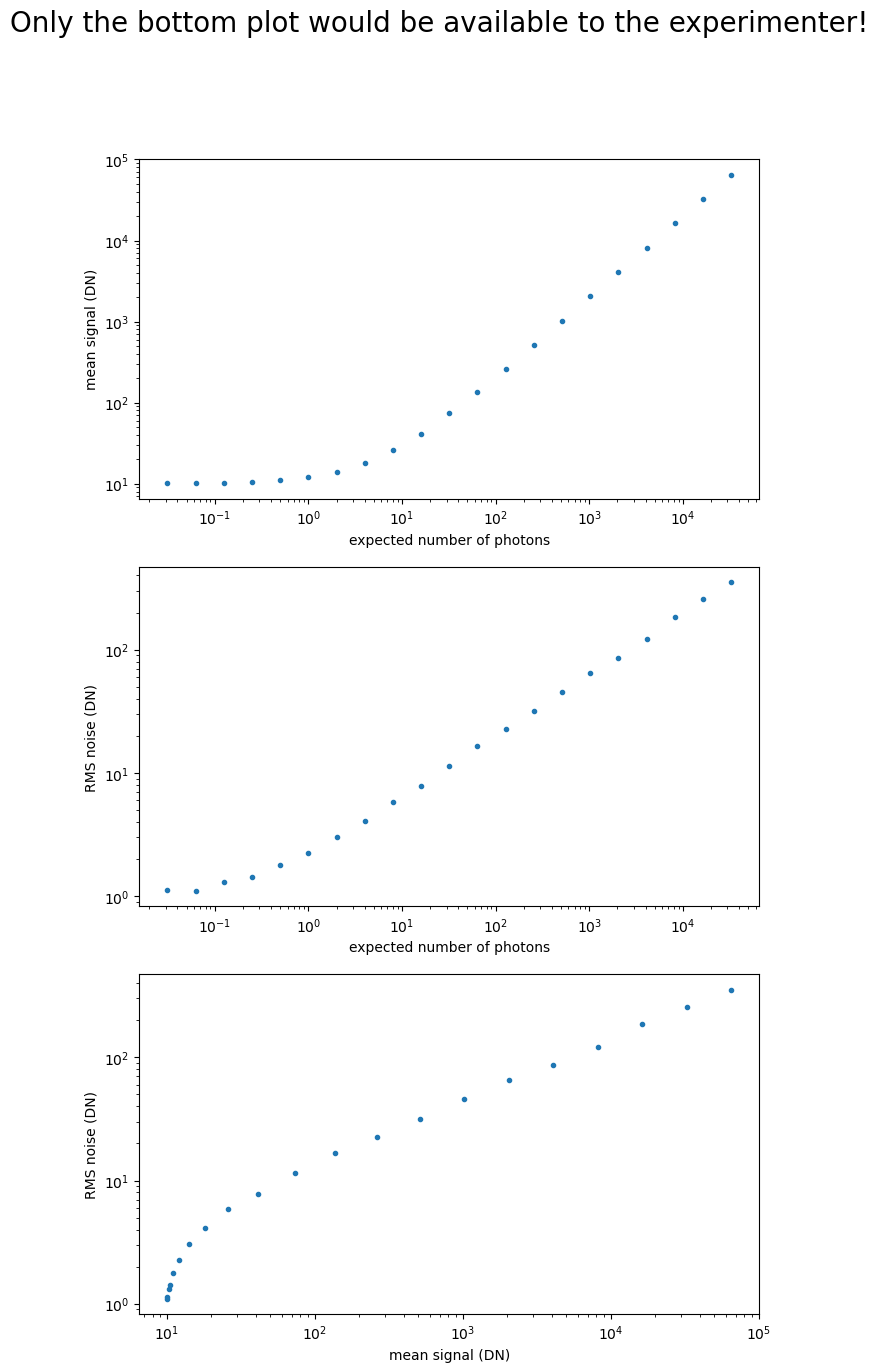

In [4]:
# Simulated photon transfer curve
# This example is using many repeated, identical frames, each with a wide distribution of 
# pixel intensities. It would be more typical to vary the exposure time to get a wide range
# of pixel values, but this way should work too.
expected_photons = 2.0**(np.arange(-5,16))
exptime = 1.0
meas = measure()
Ntrials=1000

data = np.empty((expected_photons.size, Ntrials))

plt.figure()
for trial in range(Ntrials):
    data[:,trial] = meas.observe(expected_photons, exptime)

means = np.mean(data,axis=1)
sdevs = np.std(data,axis=1,ddof=1)
    # It is debatable whether ddof=1 is the best practice. However, the result
    # here will be the square root of an unbiased estimate of the variance.

fig,axs = plt.subplots(3,1,figsize=(8,15))
fig.suptitle('Only the bottom plot would be available to the experimenter!',fontsize=20)
axs[0].plot(expected_photons,means,'.')
axs[0].set_xlabel('expected number of photons')
axs[0].set_ylabel('mean signal (DN)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].plot(expected_photons,sdevs,'.')
axs[1].set_xlabel('expected number of photons')
axs[1].set_ylabel('RMS noise (DN)')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[2].plot(means,sdevs,'.')
axs[2].set_xlabel('mean signal (DN)')
axs[2].set_ylabel('RMS noise (DN)')
axs[2].set_yscale('log')
axs[2].set_xscale('log')





plt.show()

### Exercise
How would you use a photon transfer curve (bottom plot above) to infer the properties of a camera system? Can you write a code to demonstrate the extraction of gain, bias, readout noise, etc?

### Exercise
Extend the `measure` object defined above to include the possibility of charge spreading on a 2D array of pixels. It is usually not a bad approximation to say that charge spreads only over the 8 nearest neighbors of a pixel, so you may start by assuming a $3\times 3$ array of probabilities to describe the distribution of electrons associated with a single photon striking the central pixel of that array. How does this effect potentially confuse the results of a photon transfer measurement? The challenge is: can you recover this kernel from the data?

## Flat Fields

In general, the sensitivity of the instrument is not equal across the field of view. Mapping the spatially variable sensitivity is an interesting challenge. Such a map is called a __flat field__. It is just an image array, in dimensionless units, proportional to the instrument sensitivity (as a fraction of some mean or ideal value) in every pixel. Dividing a data image by the flat field renormalizes the image so that the sensitivity is flat. I again refer you to [the IRIS calibration paper.](https://iris.lmsal.com/documents/wuelser2018.pdf). Flat fields include both detector and vignetting effects, which can be characterized separately or measured for the instrument as a whole.

### Detector
Our treatment of detectors began by assuming some expectation value for $N$, the number of photons detected. In an ideal case, this is the product of quantum efficiency, $\mathrm{QE}$, with the expectation value of the number of photons incident on the pixel. But the sensitivity of the detector array varies over its surface. Some of this is intrinsic and inherent in the manufacturing process, but sensitivity also degrades over time due to accumulated __contamination__ (particle and molecular) and __radiation damage.__ For instruments in orbit for months or years, these latter effects dominate the detector flat field. Ideally, therefore, one should design the instrument to facilitate on orbit updates to the flat field calibration.


### Vignetting
Consider my crude diagram of a Cassegrain telescope, above. The way I drew it, if the primary mirror is fully illuminated by a bundle of rays parallel to the instrument axis, then all of the incident rays reach and fill the secondary mirror. These rays continue to the center of our detector. Now imagine what happens for a bundle of rays coming from some field angle (an angle off the axis). Even If our instrument aperture does not shade the primary at all, the light from the primary may not fully illuminate the secondary. It helps to oversize the primary, but  Consequently, if the instrument is built exactly as drawn, we will find in our images a decrease in sensitivity as we move away from the central pixel.

As a side note, it is interesting that many consumer optical products such as binoculars and rifle scopes contain field lenses. A field lens at the prime focus of your binoculars images the objective aperture onto the eyepiece, so that that vignetting is minimized for off-axis light. I suppose that a similar idea (it would have to be a field mirror, rather than lens) would be possible in FUV/EUV. However, that is not common practice. For one thing,  every added reflection imposes a penalty in collected photons. For another, we can correct the vignetting easily enough by applying a flat field correction to the data. Ideally, the vignetting flat field should be measured for the instrument as built, so that small differences in vignetting between the design and implementation are fully accounted for.

### Exercise
For the following calculations, assume a small field angle, $\theta \ll 1$, but also assume $d/f \ll 1$.
1. For the diagrammed Cassegrain telescope, with the rays of the primary exactly filling the secondary mirror at zero field angle,  $d/a=D/f$. Calculate the vignetting as a geometrical aperture (area of primary mirror that has rays reaching the detector) as a function of $D$, $f$, $a$, and field angle $\theta$. For simplicity, assume that all rays from the secondary mirror make it through the hole in the primary, and that none of the light incident on the telescope aperture falls through the hole.
1. Now suppose we enlarge the secondary mirror, increasing its diameter by some amount $\delta$. All of the light reaching the primary mirror will now reach the secondary mirror for field angles $\theta < \theta_c$. This situation, in which the vignetting curve is flat, may be called an _unvignetted_ design. Calculate the relationship between $\theta_c$ and $\delta$.
1. The unvignetted design, by increasing the diameter of the secondary mirror, also reduces the on-axis sensitivity of the instrument by obscuring part of the primary. Calculate the geometrical aperture for $\theta < \theta_c$.
1. Compare the results of parts 1 and 3 by plotting the vignetting as a function of field angle for $D=300\,\mathrm{mm}$, $f=1200\,\mathrm{mm}$, $d=90\,\mathrm{mm}$, $\theta < \theta_c = 1^{\circ}$.


## Additional Detector Effects

My treatment of detectors so far has ignored a number of effects that can be important, depending on the wavelength range. Here is a brief discussion of them so that you can be aware.

### Discretization
In our discussion of the detection process, we brushed over the problem of _discretization_. Since only integer pixel values are possible, there is a $\pm 0.5\,$DN systematic error in the recorded value. Generally this is smaller than the random errors, and in fact it gets swept into our estimate of read noise when we do the photon transfer curve.

#### Exercise
I was a bit cavalier in saying that the discretization error is $\pm 0.5\,$DN. Everywhere else, I have been using $1\sigma$ errors. What is the standard deviation of discretization error?


### Fano Noise
My model here treats quantum yield ($\textrm{QY}$) as a constant, real number value. This treatment neglects Fano noise, which is a distribution of integer electron yields about the mean specified by $\textrm{QY}$. At SXR and EUV wavelengths, the Fano noise has a smaller variance than a Poisson process would. This is quantified by the so-called Fano factor of silicon, $\mathcal{F} \sim 0.1$. So if the mean quantum yield is $\left<\mathrm{QY}\right>=10\,e^-$, the variance is $\sigma^2_{\mathrm{QY}}=\mathcal{F}\left<\mathrm{QY}\right>=1\,e^2$. This model works well in FUV and shorter wavelengths, for which $\left< QY \right> >> 1$. At longer wavelengths (NUV), the Fano factor can be somewhat larger, as you will discover in the following exercise.

The statistics of quantum yield are difficult to measure, and the models are rather complicated. A state of the art model is given by [Ramanathan & Kurinsky (2020)](http://doi.org/10.1103/PhysRevD.102.063026).

#### Exercise
At some wavelength, suppose $\left<\mathrm{QY}\right>=1.5\,e^-$. Using the simple model of 3.65\,eV/e, calculate the photon energy and wavelength. (This simple rule isn't quite right at low energies, but it's close enough to get a rough idea.) Realizing that there are no half electrons, what is the _smallest possible_ variance on the number of electrons generated in this case? What would be the smallest possible value of the Fano factor? 



#### Exercise (__needs revision__)
1. Quantum yield is the average number of electrons per detected photon. My simple model expressed this as photon energy ($h\nu$) divided by 3.65 eV. Since by definititon the quantum yield is per _detected_ photon, it cannot be less than 1 electron. Naively, taking into account the possibility of a photon with energy less than 3.65 eV, we might suppose
$$
    \mathrm{QY} = \begin{cases}
        1, & E \le 3.65\,\mathrm{eV}, \\
        E/(3.65\,\mathrm{eV}), & E > 3.65\,\mathrm{eV}.
    \end{cases}
$$
In reality, the bend at 3.65 eV is not so sharp. Look up Canfield's paper on measured QY (_Metrologia,_ 1998, __35:__ 329-334). Find a smooth function that is in reasonable agreement with the data from 160 to 320 nm, and corresponds to the above model in the high and low energy limits. 
1. Look up [Fano noise](https://www-spiedigitallibrary-org.proxybz.lib.montana.edu/conference-proceedings-of-spie/0982/0000/Fano-Noise-Limited-CCDs/10.1117/12.948704.full?SSO=1). Describe what Fano noise is, how it is distributed, and how to build it into the above equation. Is Fano noise ever significant in relation to the other sources of noise, and if so, in what context(s)?
1. Modify the `measure` class above to include both Fano noise and your improved model of quantum yield.
1. Modify the `observe` method of the `measure` class to include an option for background illumination at a different wavelength.

### Charge Transfer Efficiency

As the image is transported down the columns of the CCD, occasionally a little charge will slosh back and forth between adjacent pixels. The _charge transfer efficiency_ (CTE) of modern CCDs is so high, however, that this is a subtle effect. We usually ignore it, except for the vexing situation when radiation damage induces a charge trap (a fixed point on the CCD that tends to hold onto charge and leak it out slowly during readout, causing a streak down the remainder of the column).


### Charge spreading
EUV photons are absorbed very close to the surface of the detector. When using a rear illuminated CCD, this is usually in the "field free" region, where the perodic potential that defines the pixel edges is not very distinct. Consequently, the images are slightly blurred. When the quantum yield is greater than unity, this effect can be identified in a series of repeated exposures of the same scene, because the noise is not uncorrelated from pixel to pixel.

A similar effect to charge spreading can happen when a phosphor coating (e.g., Lumogen) is used to make a CCD sensitive to VUV radiation. In this case, a VUV photon is absorbed in the phosphor, and one or more visible photons are released from the phosphor. These visible photons are then detected in the CCD. 

### Partial Charge Collection
Electron-hole pairs generated very close to the rear (that is, illuminated) surface of the detector can be re-absorbed (and therefore remain undetected) with up to $\sim 50\%$ probability. This decreases the quantum efficiency of the detector. However, for wavelengths short enough to have quantum yield of about 2 electrons or more, the noise per detected electron may be lower than expected because there are more photons (and therefore less photon shot noise) per detected electron. 


## Frame Transfer (Shutterless Mode) With a CCD

This is a placeholder for a future section. There is an inversion problem involved to correct the intensities....



## Data compression
The pixel value $P$ that the instrument measures is not always the pixel value that reaches the ground. Telemetry is a valuable but limited resource, and if we compress the data we can get more observations. Consequently, __this is an additional source of noise that data analysts sometimes forget about__.

There are many compression schemes for images; some are lossless and others lossy. One of the most common lossy schemes is _square root encoding._

### Square root encoding


In [5]:
# Square root encoding example (TBD)

### Exercise
Download some Level 0 (L0) data from IRIS or AIA. We need L0 because this comes right after the decompression stage, before subtracting dark/bias frames, flat fielding, etc. In the L0 data, only some pixel values will be present because of lossless encoding. Use the data to infer the lossy encoding table that was used. Plot the pixel value in DN _vs._ number of steps (compressed values) to show the encoding table. Unless there are saturated pixels, it may not be possible to get a complete plot.

## Point Spread Function

Ideally, we think of a point on the sky (an infinitely distant star, for example) as being imaged to a point on the focal plane. In reality—and even this is a simplifying assumption—a point on the sky maps to a blob on the detector. That blob is called the _point spread function_, $P(x,y)$. The object on the sky plane $I$ is then related to the detector image $D$ by a convolution:
$$
    D(x,y) = \iint_{\mathfrak{D}} I(x,y)\, P(x-x',y-y')\,dx'\,dy'
$$
We can put several constraints on the PSF. 
The PSF is about where the photons go, how how many of them there are. Consequently, it is normalized:
$$
    \iint_{\mathfrak{D}} P(x,y)\, \,dx\,dy = \iint_{\mathfrak{D}} P(x,y)\,x\, \,dx\,dy = 1.
$$
I like to add an additional constraint, namely that the PSF should not be encoding some kind of image shift. It should be centered at its origin. For a symmetric PSF, that is a simple matter; but PSFs (especially real ones) are not always symmetric. One way of defining "centered" would be:
$$
    \iint_{\mathfrak{D}} P(x,y)\,x\, \,dx\,dy = \iint_{\mathfrak{D}} P(x,y)\,x\, \,dx\,dy = 0.
$$
However, we must be careful. Any function that is integrable in the sense described by the normalization condition is a valid (and physically possible) PSF, but not all such functions have first moment integrals that converge.



1. Optical PSF
    1. Diffraction
    1. Design aberration
    1. Optical figure error
    1. Surface roughness and scattering
1. Detector PSF
    1. Detector pixel size
    1. Charge spreading on the CCD
1. Image processing operations performed during data analysis (including, for example, removal of distortion)


### Nyquist limit and aliasing
The finest scale

I have seen many instrument proposals touting instrument designs that are __pixel limited,__ meaning that the optics are so good that the PSF is smaller than a pixel. This is a terrible idea, for many reasons.

__Design advice:__ Always oversample your PSF. Please!

### Field Dependent PSF?
In real life, the PSF varies over the field of view. So the correct general form is
$$
    D(x,y) = \iint_{\mathfrak{D}} I(x,y)\, P(x,x',y,y')\,dx'\,dy'.
$$
Most of us try to ignore this problem.


### Time Dependent PSF?


### Exercise
Borrow a solar image (or spectrum) from the web. Make up a PSF, and convolve to produce a blurred image. Then add a little noise. Code up a simple Richardson-Lucy deconvolution algorithm, and try to recover your original image. You might find it useful to consult my [notes](http://solar.physics.montana.edu/kankel/ph567/LectureNotes/09.InverseProblems.pdf) and [examples](http://solar.physics.montana.edu/kankel/ph567/examples/Octave/integralEquations/deconvolution/) from PHSX 567.


## Distortion
In the usual thin lens approximation (which applies as well to reflective as refractive optics), Cartesian coordinates on a distant object correspond exactly to Cartesian coordinates in the image plane. As the field angle increases, this simplistic assumption breaks down for images obtained from real optical systems.

We can define distortion as a mapping from sky plane coordinates $\zeta,\eta$ to detector coordinates $x,y$. It is pretty common to do this with a polynomial of degree $N$:
$$
   x = \sum_{j+k<N} a_{jk}\zeta^j\,\eta^k; \quad y = \sum_{j+k<N} b_{jk}\zeta^j\,\eta^k.
$$
Note that $j,k \ge 0$, and that the sums are limited in the _combined_ power $j+k$.
Such a mapping can be derived, in principle, from a raytrace of the instrument. 

In practice, the mapping coefficients $a_{jk}$ and $b_{jk}$ will have to be modified based on actual data to account for small misalignments in all the optical elements. There may also be time dependencies, as structural elements of the instrument expand and contract due to changes in temperature.

### Exercise
How does distortion influence radiometry? If an ifinitesimal element of solid angle on the sky $d\Omega = d\zeta\,d\eta$ corresponds to an element of detector area $dx\,dy$, will simply interpolating an image D(x,y) to sky plane coordinates conserve intensity? How can we correct so that remapping the image from detector to sky plane coordinates conserves intensity? 

## Imaging vs. Spectroscopy
I have written the foregoing discussion as if we were only making images and not spectra. However, the considerations for a stigmatic spectrograph are very similar.

Distortion also affects the imaging from the slit to the detector in a spectrograph. For a well documented example, look at [Sarah Jaeggli's description of the geometrical correction](https://www.lmsal.com/iris_science/doc?cmd=dcur&proj_num=IS0121&file_type=pdf) that is performed automatically in the generation of IRIS Level 2 data. Because the initial and final pixel grids drift in and out of alignment over the field of view, there are some funny effects on the distribution of noise [(Longcope & Zhu 2020)]().

The PSF of a spectrograph is commonly thought of as two one dimensional functions, a vertical PSF along the slit and a horizontal line spread function (LSF) along the dispersion. See, for example, [Courrier (2018)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6190878/pdf/11207_2018_Article_1347.pdf).

### Spectral resolution and Centroiding Line Profiles

Spectral resolution cannot be any better than the Nyquist limit imposed by the detector. However, ut is possible to measure Doppler shifts much smaller than the width of a pixel. This is a nice opportunity to take my code for simulated measurements out for a spin....


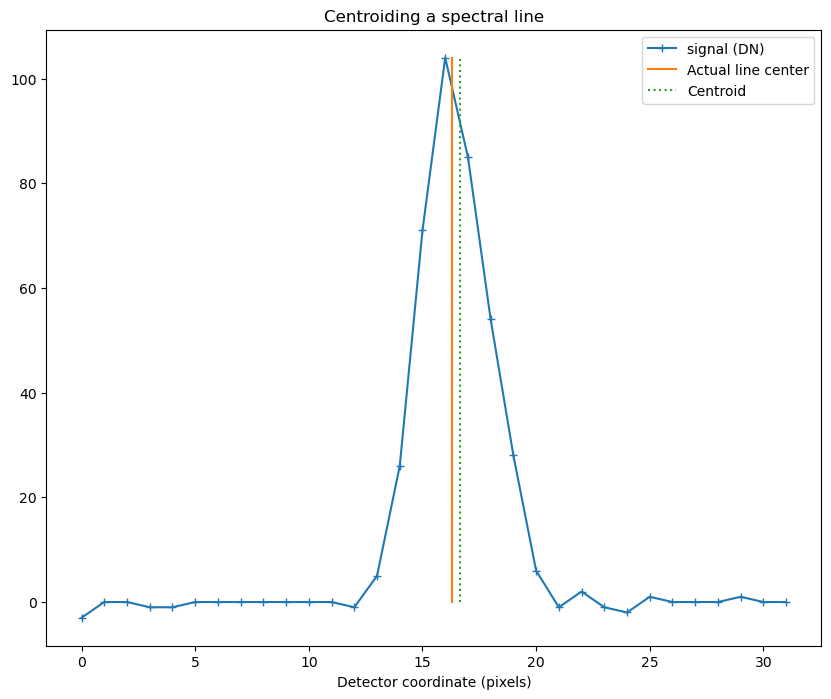

Centroiding error =  0.35951742627345845


In [6]:
import scipy.special as spec
N = 32  # Size of a small pixel array
x = np.arange(N) # Pixel coordinate
x0 = N/2.0 # location of nominal line center
linewidth = 2.0 # includes both actual spectroscopic linewidth and the instrument LSF
expected_photons = 200 # integrated over the line profile
def profile(shift, counts):
    xs = x-x0-shift
    expected_phot = 0.5*counts*( spec.erf((xs+0.5)/linewidth) - spec.erf((xs-0.5)/linewidth) )
    return meas.observe(expected_phot)

shift = 0.3 # Doppler shift in pixels
signal = profile(shift, expected_photons) - meas.bias/meas.gain # bias subtraction!
sigmax = np.amax(signal)
centroid = np.sum(signal*(x-x0))/np.sum(signal)

plt.figure(figsize=(10,8))
plt.plot(x,signal,'+-',label='signal (DN)')
plt.plot(np.ones(2)*(x0+shift), np.array([0,sigmax]),'-',label='Actual line center')
plt.plot(np.ones(2)*(x0+centroid), np.array([0,sigmax]),':',label='Centroid')
plt.xlabel('Detector coordinate (pixels)')
plt.title('Centroiding a spectral line')
plt.legend()
plt.show()
print('Centroiding error = ',centroid-shift);

RMS error =  0.1451577093822597  pixels.


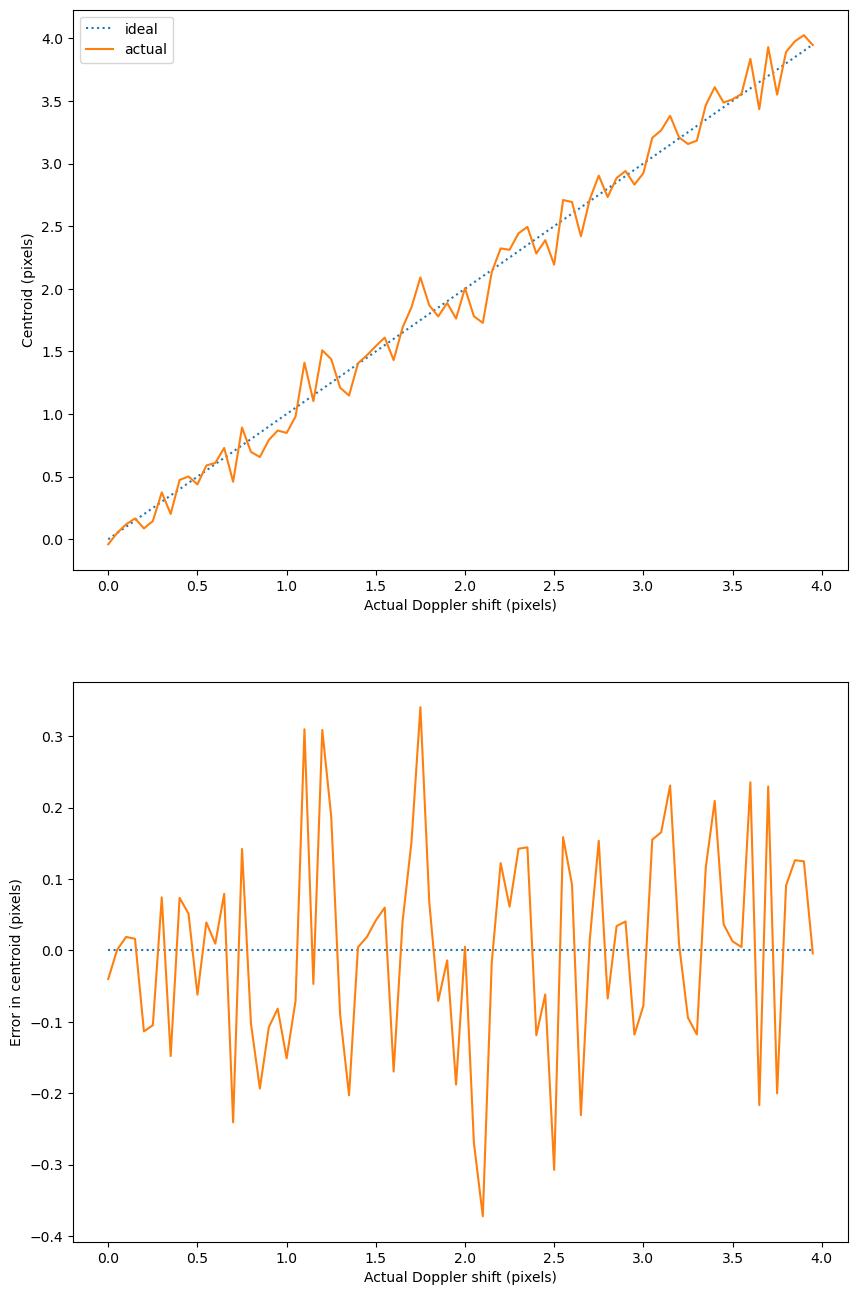

In [7]:
Ntrials = 80
shift = np.arange(Ntrials)/20
centroid=np.empty(Ntrials)
for i in range(Ntrials):
    signal = profile(shift[i], expected_photons) - meas.bias/meas.gain # bias subtraction!
    centroid[i] = np.sum(signal*(x-x0))/np.sum(signal)

fig, axs = plt.subplots(2,figsize=(10,16))
axs[0].plot(shift,shift,':',label='ideal')
axs[0].plot(shift,centroid,label='actual')
axs[0].set_xlabel('Actual Doppler shift (pixels)')
axs[0].set_ylabel('Centroid (pixels)')
axs[0].legend()
axs[1].plot(shift,0*shift,':')
axs[1].plot(shift,centroid-shift)
axs[1].set_xlabel('Actual Doppler shift (pixels)')
axs[1].set_ylabel('Error in centroid (pixels)');
print('RMS error = ',np.std(centroid-shift),' pixels.')

__Try playing with the `linewidth` parameter in the above code. Paradoxically, if the spectral resolution is too narrow (truly pixel limited, `linewidth` << 1), what goes wrong?.__

### Exercise
Can you improve the accuracy of Doppler measurement from a noisy signal? 
- Try trimming the sample of pixels that you are centroiding by omitting intensities that are within some number of standard deviations of the readout noise. 
- Instead of centroiding, try fitting the spectral line to a Gaussian (plus a constant, perhaps). Does this improve the quality of centroiding, or make it worse? If the fit includes a constant term, can that be used to compensate for an inaccurate bias subtraction? 
- How do the uncertainties of centroiding and fitting vary with the signal intensity?

## Conclusion

After reviewing many of the effects that make our data less than ideal, you may feel a little overwhelmed. Please don't be discouraged! Here are some practical bits of advice:
- Try to develop a realistic sense of what is actually _important_ to your analysis. Do you need to know the PSF accurately? Would a little error in dark subtraction invalidate your conclusions? Try to focus on what matters most for the question you are trying to answer.
- If you are starting to analyze data from an instrument you haven't used before, try to learn something about it.
    - Look at documents written by the instrument team, such as data analysis guides and instrument papers.
    - If possible, cultivate a relationship with a member of the instrument team or a seasoned user of the data.
- Be willing to try multiple approaches to solving your problem. 
- Are there arbitrary parameters (e.g., thresholds or qualitative choices) associated with your data analysis? If so:
    - Try to minimize the number of such parameters. Do the simplest thing that works.
    - Develop good reasons for parameter choices, so they aren't unconstrained.
    - Show that your conclusions are not too sensitive to arbitrary parameters. 
- You will get a better feel for these things as you work with them. There is a peculiar feeling of satisfaction that comes from really understanding your data, so keep at it. 
